In [34]:
import tensorflow as tf 

In [35]:
# Define dataset paths
train_dir = "C:\\Users\\RAHUL NEGI\\FER\\FER-Dataset\\train"
test_dir = "C:\\Users\\RAHUL NEGI\\FER\\FER-Dataset\\test"

In [36]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(48, 48),  # Resizes images to 48x48
    color_mode="grayscale",  # Converts to grayscale
    batch_size=32,
    label_mode="int"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    label_mode="int"
)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [37]:
# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


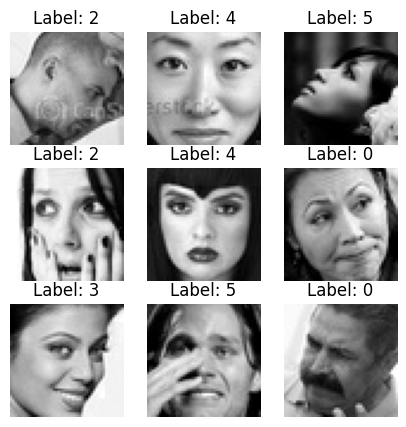

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
image_batch, label_batch = next(iter(train_dataset))

# Display images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().squeeze(), cmap='gray')  # Show grayscale image
    plt.title(f"Label: {label_batch[i].numpy()}")
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),  # 32 filters of size 3x3
    MaxPooling2D(pool_size=(2,2)),  # Reduce spatial size

    # Second Convolutional Layer
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Third Convolutional Layer
    Conv2D(256
           , (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the feature maps
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting

    # Output Layer (7 classes, softmax activation)
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\RAHUL NEGI\FER\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 894,983 (3.41 MB)

 Trainable params: 894,983 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
history = model.fit(train_dataset, 
                    validation_data=test_dataset, 
                    epochs=25)  # Train for 25 epochs


Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 192s 211ms/step - accuracy: 0.2601 - loss: 1.7869 - val_accuracy: 0.4122 - val_loss: 1.5110
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 103s 114ms/step - accuracy: 0.4147 - loss: 1.5218 - val_accuracy: 0.4650 - val_loss: 1.3736
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 105s 117ms/step - accuracy: 0.4582 - loss: 1.4080 - val_accuracy: 0.5024 - val_loss: 1.2922
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 105s 117ms/step - accuracy: 0.4871 - loss: 1.3300 - val_accuracy: 0.5091 - val_loss: 1.2629
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 104s 116ms/step - accuracy: 0.5126 - loss: 1.2708 - val_accuracy: 0.5364 - val_loss: 1.2190
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 109s 122ms/step - accuracy: 0.5342 - loss: 1.2208 - val_accuracy: 0.5429 - val_loss: 1.2044
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - accuracy: 0.5547 - loss: 1.1734 - val_accuracy: 0.5502 - val_loss: 1.1965
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 112s 125ms/step - accuracy: 0.5695 -

In [41]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.5650 - loss: 1.7952
Test Accuracy: 0.5553


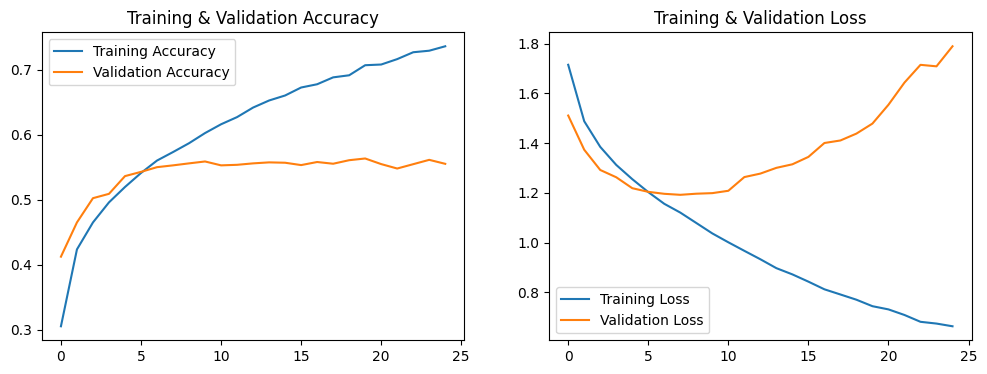

In [42]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


In [44]:
model.save("emotion_model.keras")


In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("emotion_model.keras")  # Ensure your trained model is saved as .keras

# Emotion labels
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]


In [4]:
# Initialize OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open webcam
cap = cv2.VideoCapture(0)  # 0 = Default webcam

while True:
    ret, frame = cap.read()  # Read a frame from webcam
    if not ret:
        break

    # Convert to grayscale (as the model was trained on grayscale images)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face ROI
        face = gray[y:y+h, x:x+w]

        # Resize to match model input size (48x48)
        face_resized = cv2.resize(face, (48, 48))
        face_array = np.expand_dims(face_resized, axis=0)  # Add batch dimension
        face_array = np.expand_dims(face_array, axis=-1)  # Add channel dimension

        # Normalize pixel values (same as during training)
        face_array = face_array / 255.0  

        # Predict emotion
        predictions = model.predict(face_array)
        emotion_index = np.argmax(predictions)  # Get highest probability emotion
        emotion = emotion_labels[emotion_index]

        # Draw rectangle and emotion label on the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display the result
    cv2.imshow("Facial Emotion Recognition", frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━